In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import h5py
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
H = 185
W= 269

In [280]:
import torch
def my_psnr(I,Iref,peakval):
    mse = ((I-Iref)**2).mean()
    return 10*torch.log10(peakval**2/mse)
def showSAIandEPI(SAI_img,epi_xu1,epi_xu2,epi_xu3,epi_yv1,epi_yv2,epi_yv3):
    """
    Showing SAI and EPI jointly, for either color and single channel image.
    """
    #SAI_img :H,W,(C), epi_xu:nu,W,(C) epi_yv:nv,H,(C)
    
    nullfmt = NullFormatter()         # no labels
    vmin = SAI_img.min()
    vmax = SAI_img.max()
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65 * H/W
    bottom_h = left + width - 0.289
    left_h =left + width -0.087
    EPI_spacing = 0.02

    rect_SAI = [left, bottom, width, height]
    rect_EPIxu1 = [left, bottom_h, width, 0.2]
    rect_EPIxu2 = [left, bottom_h+EPI_spacing, width, 0.2]
    rect_EPIxu3 = [left, bottom_h+EPI_spacing*2+0.001, width, 0.2]

    rect_EPIyv1 = [left_h, bottom, 0.2, height]
    rect_EPIyv2 = [left_h+EPI_spacing, bottom, 0.2, height]
    rect_EPIyv3 = [left_h+EPI_spacing*2, bottom, 0.2, height]
    # start with a rectangular Figure
    plt.figure(1, figsize=(8, 8))
    axSAI = plt.axes(rect_SAI)

    axEPIxu1 = plt.axes(rect_EPIxu1)
    axEPIxu2 = plt.axes(rect_EPIxu2)
    axEPIxu3 = plt.axes(rect_EPIxu3)

    axEPIyv1 = plt.axes(rect_EPIyv1)
    axEPIyv2 = plt.axes(rect_EPIyv2)
    axEPIyv3 = plt.axes(rect_EPIyv3)

    # no labels
    axSAI.xaxis.set_major_locator(plt.NullLocator())
    axSAI.yaxis.set_major_locator(plt.NullLocator())

    axEPIxu1.xaxis.set_major_locator(plt.NullLocator())
    axEPIxu1.yaxis.set_major_locator(plt.NullLocator())
    axEPIxu2.xaxis.set_major_locator(plt.NullLocator())
    axEPIxu2.yaxis.set_major_locator(plt.NullLocator())
    axEPIxu3.xaxis.set_major_locator(plt.NullLocator())
    axEPIxu3.yaxis.set_major_locator(plt.NullLocator())

    axEPIyv1.xaxis.set_major_locator(plt.NullLocator())
    axEPIyv1.yaxis.set_major_locator(plt.NullLocator())
    axEPIyv2.xaxis.set_major_locator(plt.NullLocator())
    axEPIyv2.yaxis.set_major_locator(plt.NullLocator())
    axEPIyv3.xaxis.set_major_locator(plt.NullLocator())
    axEPIyv3.yaxis.set_major_locator(plt.NullLocator())
    # the scatter plot:
    axSAI.imshow(SAI_img,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))

    # now determine nice limits by hand:
    axEPIxu1.imshow(epi_xu1,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))
    axEPIxu2.imshow(epi_xu2,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))
    axEPIxu3.imshow(epi_xu3,vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))
    axEPIyv1.imshow(np.rot90(epi_yv1,3),vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))
    axEPIyv2.imshow(np.rot90(epi_yv2,3),vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))
    axEPIyv3.imshow(np.rot90(epi_yv3,3),vmin=vmin,vmax=vmax,cmap=plt.get_cmap('gray'))

    fig = plt.gcf()
    plt.show()
    return fig

In [4]:
data_folder = 'paper result'
Direct_recon = 'Direct_regression_unet_FS2LF_v3_tanh_lr_5e-4_bs_train_2_bs_val_5_100testsample(first50saved)_result'
EP_recon = 'EP_alpha_1p6e5_delta_3p8e-1_100test_sample_result.mat'
our_method= 'Avoid_invcrime_Two stage model_DIBR_FS_dmin_-1_dmax_0.3_nF_7_GenMat_concat_SAI_True_disp_mult_1_detach_ray_depths_lr_3e-4_lam_tv_1e-2_lam_dc_5e-3_bs_train_1_bs_val_1_100testsample(30saved)_result'
single_SAI ='Avoid_invcrime_Two stage model_DIBR_SAI_only_True_disp_mult_1_detach_ray_depths_lr_3e-4_lam_tv_1e-2_lam_dc_5e-3_bs_train_1_bs_val_1_100testsample(30saved)_result'

Direct_recon_result = sio.loadmat(os.path.join(data_folder,Direct_recon))
our_method_result = sio.loadmat(os.path.join(data_folder,our_method))
single_SAI_result = sio.loadmat(os.path.join(data_folder,single_SAI))

EP_recon_f = h5py.File(os.path.join(data_folder,EP_recon))

In [5]:
EP_recon = 'EP_alpha_1p6e5_delta_3p8e-1_100test_sample_result.mat'
EP_recon_f = h5py.File(os.path.join(data_folder,EP_recon),'r')
EP_reconLF_all = EP_recon_f['reconLF_all'][:]
#To reshape EP result LF to have same cooridnate convention as other results (Correctness verified)
for n in range(100):
    for i in range(7):
        for j in range(7):
            EP_reconLF_all[n,:,i,j,:,:] =np.rot90(EP_reconLF_all[n,:,i,j,:,:].transpose(1,2,0),2).transpose(2,0,1)

## Show SAI error map

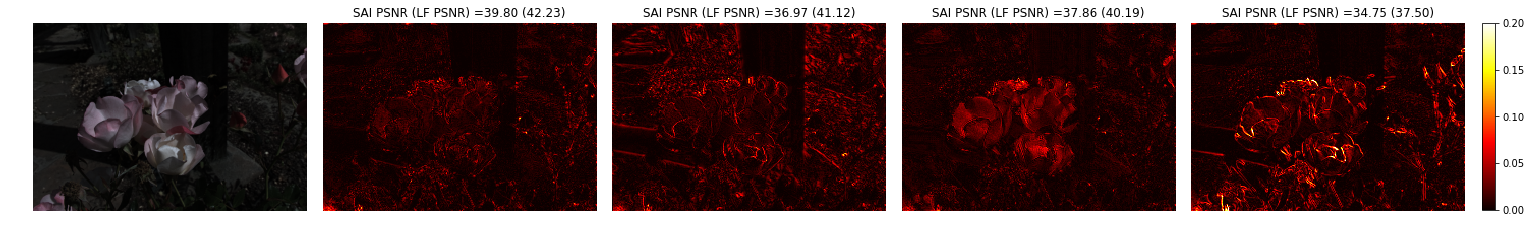

In [307]:
color_channel = 1
sample_idx = 6
view_v,view_u = 6,0
cmap  = plt.cm.get_cmap(name='hot')
clim_upper=0.2

f = plt.figure(figsize=(25,5))
plt.subplots_adjust(wspace=0.06)
f.add_subplot(1,5,1)
plt.imshow(our_method_result['trueLF_all'][sample_idx][:,3,3,:,:].transpose(1,2,0),cmap = cmap)
plt.axis('off')

ground_truth = our_method_result['trueLF_all'][sample_idx][color_channel,view_v,view_u]
ax=f.add_subplot(1,5,2)
plt.imshow(np.abs(our_method_result['reconLF_all'][sample_idx][color_channel,view_v,view_u]-ground_truth),cmap = cmap)
PSNR = my_psnr(torch.from_numpy(our_method_result['reconLF_all'][sample_idx]),torch.from_numpy(our_method_result['trueLF_all'][sample_idx]),1)
PSNR_SAI = my_psnr(torch.from_numpy(our_method_result['reconLF_all'][sample_idx][color_channel,view_v,view_u]),torch.from_numpy(ground_truth),1)
plt.title('SAI PSNR (LF PSNR) =%.2f (%.2f)' %(PSNR_SAI,PSNR))
plt.axis('off')
plt.clim(0,clim_upper)

f.add_subplot(1,5,3)
plt.imshow(np.abs(EP_reconLF_all[sample_idx][color_channel,view_v,view_u]-ground_truth),cmap = cmap)
PSNR = my_psnr(torch.from_numpy(EP_reconLF_all[sample_idx]),torch.from_numpy(our_method_result['trueLF_all'][sample_idx]),1)
PSNR_SAI = my_psnr(torch.from_numpy(EP_reconLF_all[sample_idx][color_channel,view_v,view_u]),torch.from_numpy(ground_truth),1)
plt.title('SAI PSNR (LF PSNR) =%.2f (%.2f)' %(PSNR_SAI,PSNR))
plt.axis('off')
plt.clim(0,clim_upper)

f.add_subplot(1,5,4)
plt.imshow(np.abs(Direct_recon_result['reconLF_all'][sample_idx][color_channel,view_v,view_u]-ground_truth),cmap = cmap)
PSNR = my_psnr(torch.from_numpy(Direct_recon_result['reconLF_all'][sample_idx]),torch.from_numpy(our_method_result['trueLF_all'][sample_idx]),1)
PSNR_SAI = my_psnr(torch.from_numpy(Direct_recon_result['reconLF_all'][sample_idx][color_channel,view_v,view_u]),torch.from_numpy(ground_truth),1)
plt.title('SAI PSNR (LF PSNR) =%.2f (%.2f)' %(PSNR_SAI,PSNR))
plt.axis('off')
plt.clim(0,clim_upper)

ax=f.add_subplot(1,5,5)
plt.imshow(np.abs(single_SAI_result['reconLF_all'][sample_idx][color_channel,view_v,view_u]-ground_truth),cmap = cmap)
PSNR = my_psnr(torch.from_numpy(single_SAI_result['reconLF_all'][sample_idx]),torch.from_numpy(our_method_result['trueLF_all'][sample_idx]),1)
PSNR_SAI = my_psnr(torch.from_numpy(single_SAI_result['reconLF_all'][sample_idx][color_channel,view_v,view_u]),torch.from_numpy(ground_truth),1)
plt.axis('off')
plt.title('SAI PSNR (LF PSNR) =%.2f (%.2f)' %(PSNR_SAI,PSNR))
plt.clim(0,clim_upper)

f.subplots_adjust(right=0.92)
cbar_ax = f.add_axes([0.93, 0.244, 0.007, 0.52])
plt.colorbar(cax=cbar_ax,ticks=[0,0.05,0.1,0.15,0.2])

plt.savefig('PSNR',dpi=600)


## Show reconSAI and EPI slices

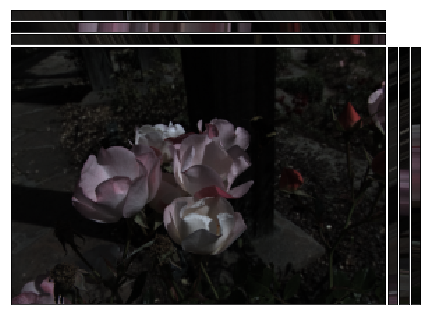

In [308]:
sample_idx = 6
view_v,view_u = 6,0
y1,v1 = 50,3
y2,v2 = 100,3
y3,v3 = 150,3
x1,u1 = 20,3
x2,u2 = 50,3
x3,u3 = 100,3
SAI_img = our_method_result['trueLF_all'][sample_idx][:,view_v,view_u].transpose(1,2,0)
epi_xu1 = our_method_result['trueLF_all'][sample_idx][:,v1,:,y1,:].transpose(1,2,0)
epi_xu2 = our_method_result['trueLF_all'][sample_idx][:,v2,:,y2,:].transpose(1,2,0)
epi_xu3 = our_method_result['trueLF_all'][sample_idx][:,v3,:,y3,:].transpose(1,2,0)

epi_yv1 = our_method_result['trueLF_all'][sample_idx][:,:,u1,:,x1].transpose(1,2,0)
epi_yv2 = our_method_result['trueLF_all'][sample_idx][:,:,u2,:,x2].transpose(1,2,0)
epi_yv3 = our_method_result['trueLF_all'][sample_idx][:,:,u3,:,x3].transpose(1,2,0)
fig=showSAIandEPI(SAI_img,epi_xu1,epi_xu2,epi_xu3,epi_yv1,epi_yv2,epi_yv3)
fig.savefig('sample_6_v_7_u_1_trueSAI.png',dpi=600)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


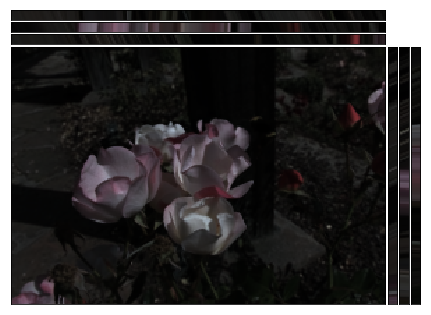

In [309]:
sample_idx = 6
view_v,view_u = 6,0
y1,v1 = 50,3
y2,v2 = 100,3
y3,v3 = 150,3
x1,u1 = 20,3
x2,u2 = 50,3
x3,u3 = 100,3
SAI_img = our_method_result['reconLF_all'][sample_idx][:,view_v,view_u].transpose(1,2,0)
epi_xu1 = our_method_result['reconLF_all'][sample_idx][:,v1,:,y1,:].transpose(1,2,0)
epi_xu2 = our_method_result['reconLF_all'][sample_idx][:,v2,:,y2,:].transpose(1,2,0)
epi_xu3 = our_method_result['reconLF_all'][sample_idx][:,v3,:,y3,:].transpose(1,2,0)

epi_yv1 = our_method_result['reconLF_all'][sample_idx][:,:,u1,:,x1].transpose(1,2,0)
epi_yv2 = our_method_result['reconLF_all'][sample_idx][:,:,u2,:,x2].transpose(1,2,0)
epi_yv3 = our_method_result['reconLF_all'][sample_idx][:,:,u3,:,x3].transpose(1,2,0)
fig=showSAIandEPI(SAI_img,epi_xu1,epi_xu2,epi_xu3,epi_yv1,epi_yv2,epi_yv3)
fig.savefig('sample_6_v_7_u_1_our_method_reconSAI.png',dpi=600)

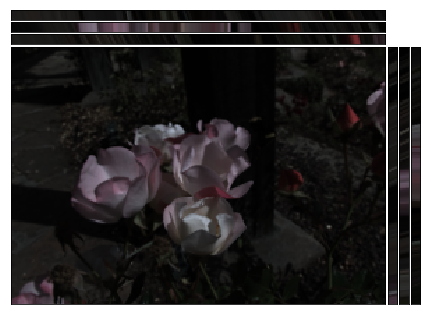

In [310]:
sample_idx = 6
view_v,view_u = 6,0
y1,v1 = 50,3
y2,v2 = 100,3
y3,v3 = 150,3
x1,u1 = 20,3
x2,u2 = 50,3
x3,u3 = 100,3
SAI_img = single_SAI_result['reconLF_all'][sample_idx][:,view_v,view_u].transpose(1,2,0)
epi_xu1 = single_SAI_result['reconLF_all'][sample_idx][:,v1,:,y1,:].transpose(1,2,0)
epi_xu2 = single_SAI_result['reconLF_all'][sample_idx][:,v2,:,y2,:].transpose(1,2,0)
epi_xu3 = single_SAI_result['reconLF_all'][sample_idx][:,v3,:,y3,:].transpose(1,2,0)

epi_yv1 = single_SAI_result['reconLF_all'][sample_idx][:,:,u1,:,x1].transpose(1,2,0)
epi_yv2 = single_SAI_result['reconLF_all'][sample_idx][:,:,u2,:,x2].transpose(1,2,0)
epi_yv3 = single_SAI_result['reconLF_all'][sample_idx][:,:,u3,:,x3].transpose(1,2,0)
fig=showSAIandEPI(SAI_img,epi_xu1,epi_xu2,epi_xu3,epi_yv1,epi_yv2,epi_yv3)
#fig.savefig('sample_6_v_7_u_1_our_method_reconSAI.png',dpi=600)

## Show ray depth

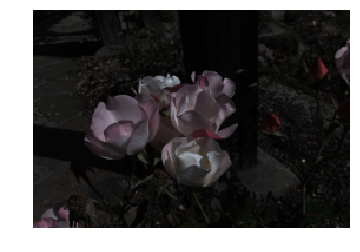

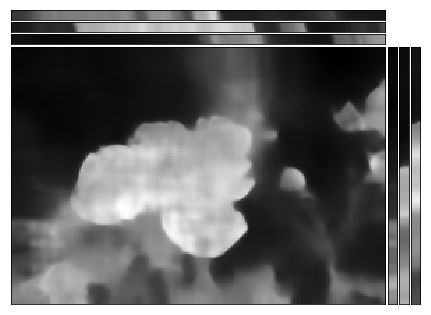

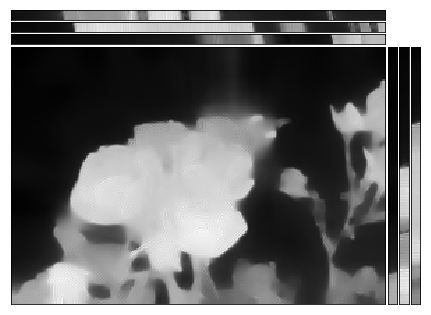

In [306]:
sample_idx = 6 #6,10,22
view_v,view_u = 3,3
y1,v1 = 50,3
y2,v2 = 100,3
y3,v3 = 150,3
x1,u1 = 20,3
x2,u2 = 50,3
x3,u3 = 100,3
plt.figure()
plt.imshow(our_method_result['trueLF_all'][sample_idx][:,view_v,view_u,:,:].transpose(1,2,0))
plt.axis('off')
plt.savefig('TrueCentralSAI_sample_6.png')
plt.show()


SAI_img = single_SAI_result['depth'][sample_idx][view_v,view_u]
epi_xu1 = single_SAI_result['depth'][sample_idx][v1,:,y1,:]
epi_xu2 = single_SAI_result['depth'][sample_idx][v2,:,y2,:]
epi_xu3 = single_SAI_result['depth'][sample_idx][v3,:,y3,:]

epi_yv1 = single_SAI_result['depth'][sample_idx][:,u1,:,x1]
epi_yv2 = single_SAI_result['depth'][sample_idx][:,u2,:,x2]
epi_yv3 = single_SAI_result['depth'][sample_idx][:,u3,:,x3]
fig=showSAIandEPI(SAI_img,epi_xu1,epi_xu2,epi_xu3,epi_yv1,epi_yv2,epi_yv3)
fig.savefig('single_SAI_result_depth.png')
SAI_img = our_method_result['depth'][sample_idx][view_v,view_u]
epi_xu1 = our_method_result['depth'][sample_idx][v1,:,y1,:]
epi_xu2 = our_method_result['depth'][sample_idx][v2,:,y2,:]
epi_xu3 = our_method_result['depth'][sample_idx][v3,:,y3,:]

epi_yv1 = our_method_result['depth'][sample_idx][:,u1,:,x1]
epi_yv2 = our_method_result['depth'][sample_idx][:,u2,:,x2]
epi_yv3 = our_method_result['depth'][sample_idx][:,u3,:,x3]
fig=showSAIandEPI(SAI_img,epi_xu1,epi_xu2,epi_xu3,epi_yv1,epi_yv2,epi_yv3)
fig.savefig('our_method_result_depth.png')
